In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from nltk.tokenize import word_tokenize;
from nltk.stem import WordNetLemmatizer;

In [2]:
#from tensorflow.keras import mixed_precision;
#mixed_precision.set_global_policy('mixed_float16')

In [3]:
df=pd.read_csv("BooksDataSet.csv")
df.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3000 non-null   int64 
 1   book_id     3000 non-null   int64 
 2   book_name   3000 non-null   object
 3   genre       3000 non-null   object
 4   summary     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [5]:
df.describe()

,Unnamed: 0,book_id
count,3000.000000,3.000000e+03
mean,1499.500000,9.258275e+06
std,866.169729,8.375375e+06
min,0.000000,8.430000e+02
25%,749.750000,2.944599e+06
50%,1499.500000,6.169495e+06
75%,2249.250000,1.373293e+07
max,2999.000000,3.705402e+07


In [6]:
df.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [7]:
df.drop(['Unnamed: 0','book_id'],axis=1,inplace=True)

In [8]:
df['genre'].unique()

array(['Fantasy', 'Science Fiction', 'Crime Fiction', 'Historical novel',
       'Horror', 'Thriller'], dtype=object)

In [9]:
df['genre_id']=df['genre'].factorize()[0]
df.head()

,book_name,genre,summary,genre_id
0,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...,0
1,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ...",0
2,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...,0
3,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...,0
4,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...,0


In [10]:
category=df[['genre_id','genre']].drop_duplicates().sort_values('genre_id')

In [11]:
category

,genre_id,genre
0,0,Fantasy
500,1,Science Fiction
1000,2,Crime Fiction
1500,3,Historical novel
2000,4,Horror
2500,5,Thriller


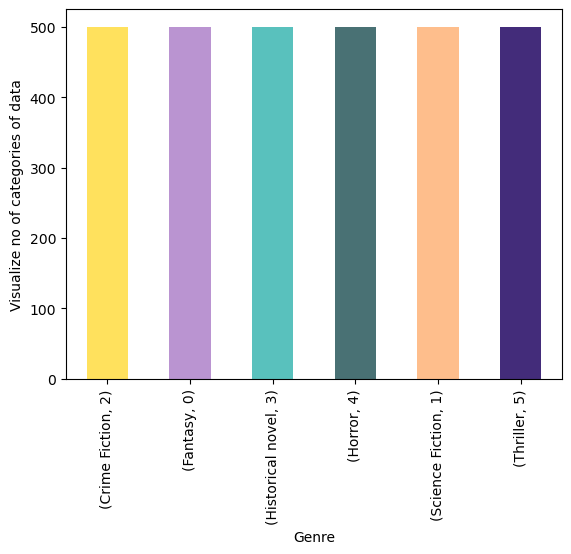

In [12]:
df.groupby('genre').genre_id.value_counts().plot(kind='bar',color=['#FFE15D','#BA94D1','#59C1BD','#497174','#FEBE8C','#432C7A'])
plt.xlabel('Genre')
plt.ylabel('Visualize no of categories of data')
plt.show()

In [13]:
category

,genre_id,genre
0,0,Fantasy
500,1,Science Fiction
1000,2,Crime Fiction
1500,3,Historical novel
2000,4,Horror
2500,5,Thriller


Fantasy Related Words:


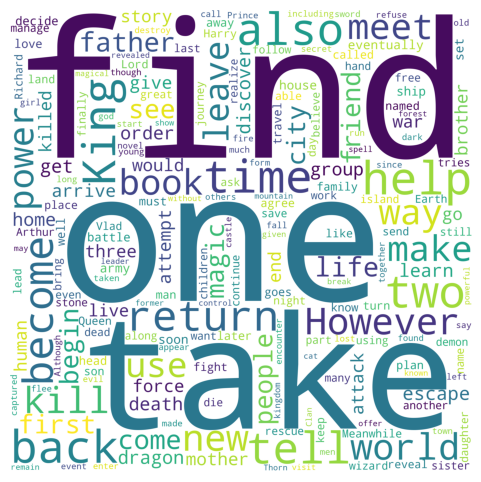

Science Fiction Related Words:


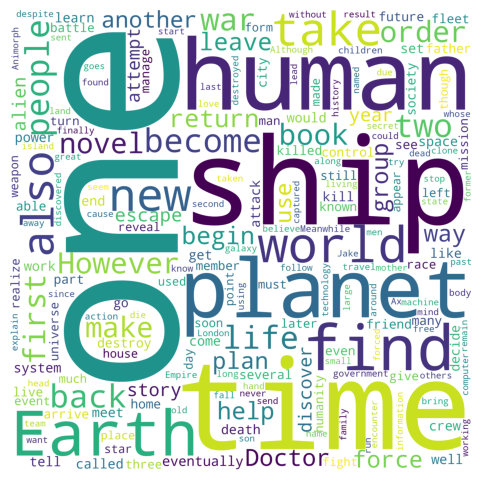

Crime Fiction Related Words:


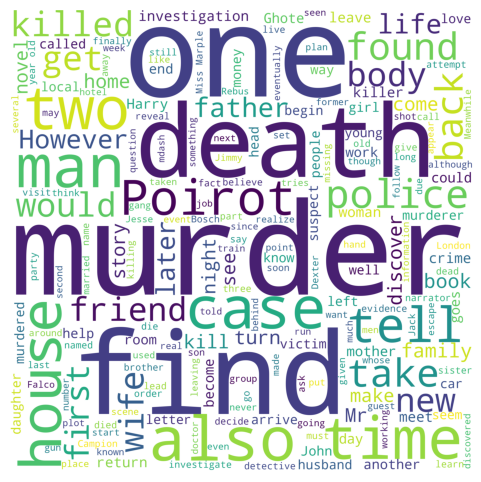

Historical Novel Related Words:


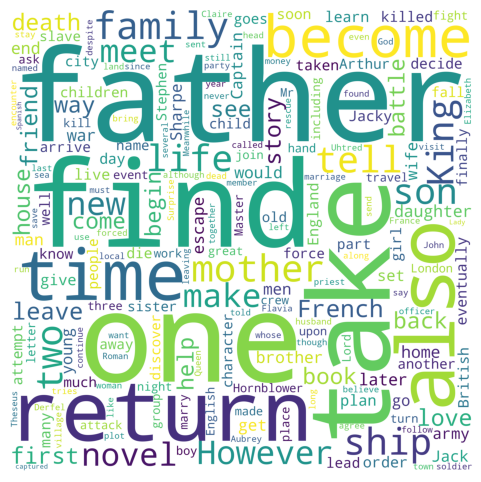

Horror Related Words:


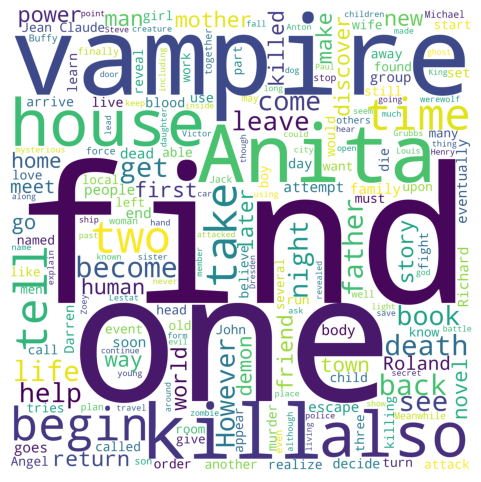

Thriller Related Words:


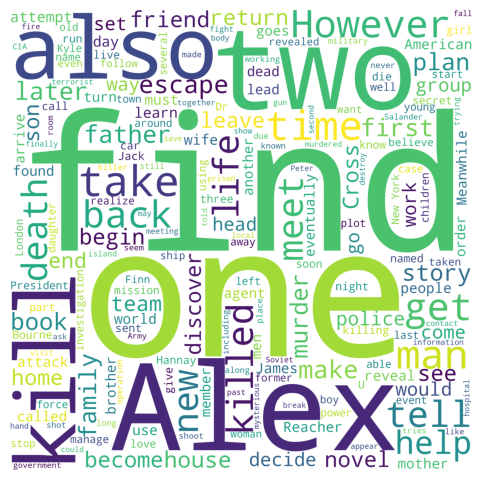

In [14]:
from wordcloud import WordCloud;
from nltk.corpus import stopwords;
stop=set(stopwords.words('english'))
fantasy=df[df['genre_id']==0]
fantasy=fantasy['summary']
science_fiction=df[df['genre_id']==1]
science_fiction=science_fiction['summary']
crime_fiction=df[df['genre_id']==2]
crime_fiction=crime_fiction['summary']
historical_novel=df[df['genre_id']==3]
historical_novel=historical_novel['summary']
horror=df[df['genre_id']==4]
horror=horror['summary']
thriller=df[df['genre_id']==5]
thriller=thriller['summary']

def wordcloud_draw(df,color='white'):
    words=' '.join(df)
    cleaned_word=' '.join(word for word in words.split())
    wordcloud=WordCloud(stopwords=stop,background_color=color,width=2500,height=2500).generate(cleaned_word)
    plt.figure(1,figsize=(15,6))
    plt.axis(False)
    plt.imshow(wordcloud)
    plt.show()
print('Fantasy Related Words:')
wordcloud_draw(fantasy)
print('Science Fiction Related Words:')
wordcloud_draw(science_fiction)
print('Crime Fiction Related Words:')
wordcloud_draw(crime_fiction)
print('Historical Novel Related Words:')
wordcloud_draw(historical_novel)
print('Horror Related Words:')
wordcloud_draw(horror)
print('Thriller Related Words:')
wordcloud_draw(thriller)
  

In [15]:
df.head(2)

,book_name,genre,summary,genre_id
0,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...,0
1,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ...",0


In [16]:
import neattext.functions as nfx;
def clean_text(text):
    text=nfx.remove_special_characters(text)
    text=nfx.remove_multiple_spaces(text)
    text=nfx.remove_bad_quotes(text)
    text=nfx.remove_currency_symbols(text)
    text=nfx.remove_dates(text)
    text=nfx.remove_numbers(text)
    text=nfx.remove_currencies(text)
    text=nfx.remove_punctuations(text)
    text=text.lower()
    return text


def lemmatize_word(text):
    wordnet=WordNetLemmatizer()
    return ' '.join([wordnet.lemmatize(word)for word in text.split()])

df['summary']=df['summary'].apply(lambda x:clean_text(x))

In [17]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if not word in set(stopwords.words('english'))])

In [18]:
df['summary']=df['summary'].apply(lambda x:lemmatize_word(x))

In [19]:
df['summary']=df['summary'].apply(lambda x:remove_stopwords(x))

In [20]:
df['summary']

0       drowned wednesday first trustee among morrow d...
1       book open jason awakens school bus unable reme...
2       cugel easily persuaded merchant fianosther att...
3       book open heraldmage vanyel returning country ...
4       taran gurgi returned caer dallben following ev...
                              ...                        
2995    novel numa file kurt austin adventure novel ma...
2996    gilbert kemp dealer specializing antique gun l...
2997    know youre deep davey ha always lived shadow o...
2998    story concern life johnnie pascoe retired comm...
2999    first chief henry lee novel open growing town ...
Name: summary, Length: 3000, dtype: object

In [21]:
df.head()

,book_name,genre,summary,genre_id
0,Drowned Wednesday,Fantasy,drowned wednesday first trustee among morrow d...,0
1,The Lost Hero,Fantasy,book open jason awakens school bus unable reme...,0
2,The Eyes of the Overworld,Fantasy,cugel easily persuaded merchant fianosther att...,0
3,Magic's Promise,Fantasy,book open heraldmage vanyel returning country ...,0
4,Taran Wanderer,Fantasy,taran gurgi returned caer dallben following ev...,0


In [22]:
from sklearn.preprocessing import OneHotEncoder;
encoder=OneHotEncoder(sparse=False)
labels=encoder.fit_transform(df['genre_id'].to_numpy().reshape(-1,1))

In [23]:
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test=train_test_split(df['summary'].to_numpy(),labels,test_size=0.2,random_state=42)

In [24]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization;
text_vectorizer=TextVectorization(max_tokens=3100,
                                  output_mode='int',
                                  output_sequence_length=255)
text_vectorizer.adapt(x_train)

In [25]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 3100,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 255,
 'pad_to_max_tokens': False}

In [26]:
text_vocab=text_vectorizer.get_vocabulary()

In [27]:
#most used words
text_vocab[:5]

['', '[UNK]', 'ha', 'wa', 'one']

In [28]:
#least used words
text_vocab[-5:]

['employed', 'emotional', 'eliza', 'elite', 'easy']

In [29]:
import tensorflow as tf;
tf.random.set_seed(42)
embedding=tf.keras.layers.Embedding(input_dim=len(text_vocab),output_dim=128,
                                    embeddings_initializer='uniform',input_length=255)

In [30]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(500).batch(16).prefetch(tf.data.AUTOTUNE)
test_data=tf.data.Dataset.from_tensor_slices((x_test,y_test)).shuffle(500).batch(16).prefetch(tf.data.AUTOTUNE)

In [31]:
inputs=tf.keras.layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.GlobalAveragePooling1D()(x)
x=tf.keras.layers.Dense(6,activation='softmax')(x)
model_1=tf.keras.Model(inputs=inputs,outputs=x)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [32]:
model_1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
75/75 [==============================] - 4s 16ms/step - loss: 1.7814 - accuracy: 0.2467 - val_loss: 1.7644 - val_accuracy: 0.3167
Epoch 2/50
75/75 [==============================] - 1s 10ms/step - loss: 1.7448 - accuracy: 0.3608 - val_loss: 1.7278 - val_accuracy: 0.3633
Epoch 3/50
75/75 [==============================] - 1s 9ms/step - loss: 1.6934 - accuracy: 0.4038 - val_loss: 1.6764 - val_accuracy: 0.3917
Epoch 4/50
75/75 [==============================] - 1s 9ms/step - loss: 1.6168 - accuracy: 0.5208 - val_loss: 1.6019 - val_accuracy: 0.5083
Epoch 5/50
75/75 [==============================] - 1s 9ms/step - loss: 1.5128 - accuracy: 0.5950 - val_loss: 1.5143 - val_accuracy: 0.5383
Epoch 6/50
75/75 [==============================] - 1s 8ms/step - loss: 1.3937 - accuracy: 0.6379 - val_loss: 1.4216 - val_accuracy: 0.5817
Epoch 7/50
75/75 [==============================] - 1s 9ms/step - loss: 1.2720 - accuracy: 0.6933 - val_loss: 1.3336 - val_accuracy: 0.5917
Epoch 8/50
75/75 [

In [33]:
model_1.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
150/150 [==============================] - 2s 10ms/step - loss: 0.1207 - accuracy: 0.9875 - val_loss: 1.1409 - val_accuracy: 0.6783
Epoch 2/50
150/150 [==============================] - 1s 8ms/step - loss: 0.1090 - accuracy: 0.9900 - val_loss: 1.1642 - val_accuracy: 0.6783
Epoch 3/50
150/150 [==============================] - 1s 8ms/step - loss: 0.0999 - accuracy: 0.9900 - val_loss: 1.1822 - val_accuracy: 0.6767
Epoch 4/50
150/150 [==============================] - 1s 8ms/step - loss: 0.0929 - accuracy: 0.9896 - val_loss: 1.1997 - val_accuracy: 0.6850
Epoch 5/50
150/150 [==============================] - 1s 8ms/step - loss: 0.0858 - accuracy: 0.9925 - val_loss: 1.2257 - val_accuracy: 0.6817
Epoch 6/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0790 - accuracy: 0.9917 - val_loss: 1.2459 - val_accuracy: 0.6850
Epoch 7/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0729 - accuracy: 0.9933 - val_loss: 1.2695 - val_accuracy: 0.6717
Epoch

In [34]:
inputs=tf.keras.layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.Conv1D(filters=32,kernel_size=5,activation='relu')(x)
x=tf.keras.layers.GlobalAveragePooling1D()(x)
x=tf.keras.layers.Dense(6,activation='softmax')(x)
model_2=tf.keras.Model(inputs=inputs,outputs=x)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [35]:
model_2.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
150/150 [==============================] - 14s 10ms/step - loss: 0.9169 - accuracy: 0.8512 - val_loss: 1.0535 - val_accuracy: 0.6483
Epoch 2/50
150/150 [==============================] - 1s 9ms/step - loss: 0.2392 - accuracy: 0.9937 - val_loss: 1.1293 - val_accuracy: 0.6517
Epoch 3/50
150/150 [==============================] - 1s 9ms/step - loss: 0.1047 - accuracy: 0.9962 - val_loss: 1.2549 - val_accuracy: 0.6650
Epoch 4/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0609 - accuracy: 0.9967 - val_loss: 1.3881 - val_accuracy: 0.6533
Epoch 5/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0411 - accuracy: 0.9971 - val_loss: 1.4889 - val_accuracy: 0.6517
Epoch 6/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0309 - accuracy: 0.9971 - val_loss: 1.5862 - val_accuracy: 0.6583
Epoch 7/50
150/150 [==============================] - 1s 9ms/step - loss: 0.0248 - accuracy: 0.9971 - val_loss: 1.6760 - val_accuracy: 0.6533
Epoc

In [36]:
import tensorflow_hub as hub;
sentence_encoding_layer=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape=[],
                                       dtype=tf.string,
                                       trainable=False)

In [37]:
model_3=tf.keras.Sequential([
    sentence_encoding_layer,
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [38]:
model_3.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
150/150 [==============================] - 9s 35ms/step - loss: 1.4836 - accuracy: 0.4542 - val_loss: 1.1136 - val_accuracy: 0.6033
Epoch 2/50
150/150 [==============================] - 4s 29ms/step - loss: 1.0043 - accuracy: 0.6392 - val_loss: 1.0642 - val_accuracy: 0.5900
Epoch 3/50
150/150 [==============================] - 4s 30ms/step - loss: 0.8903 - accuracy: 0.6754 - val_loss: 0.9654 - val_accuracy: 0.6483
Epoch 4/50
150/150 [==============================] - 5s 31ms/step - loss: 0.8170 - accuracy: 0.7183 - val_loss: 0.9641 - val_accuracy: 0.6617
Epoch 5/50
150/150 [==============================] - 5s 30ms/step - loss: 0.7664 - accuracy: 0.7312 - val_loss: 0.9776 - val_accuracy: 0.6600
Epoch 6/50
150/150 [==============================] - 5s 30ms/step - loss: 0.7134 - accuracy: 0.7458 - val_loss: 0.9913 - val_accuracy: 0.6450
Epoch 7/50
150/150 [==============================] - 4s 30ms/step - loss: 0.6819 - accuracy: 0.7608 - val_loss: 1.0184 - val_accuracy: 0.6600

In [39]:
model_3.save('USE_model')

INFO:tensorflow:Assets written to: USE_model\assets


INFO:tensorflow:Assets written to: USE_model\assets


In [40]:
probs=model_3.predict(['protagonist arthur art mumby older sister myrtle invited starcross hotel small periodically barren asteroid arthur mother emily suspect starcross built piece mar routinely slip hole fabric time myrtle discovers sir richard burton martian wife ulla changed tree jack havock british secret agent appears scene disguised indian prince following night attacked moobs specie resembling animated black top hat take control jack crew guest including emily myrtle jack escape become lost desert prehistoric mar encounter delphine one guest french secret agent determined find grandfather wrecked ship create americanstyle republic name wreck discover delphines grandfather wa killed moobs later learn moobs native time period near end universe live chiefly feeding specie thought wellintentioned moob help jack win delphines soldier side return starcross moobs load jack ship comrade plan take control local society art free jack crew influence return starcross discover arthur mother sufficient memory sate ha subdued moobs starcross owner sir launcelot sprigg delphine attempt overpower others arthur mother change baby protagonist enter future inspire moobs new thought whereby stimulated greater activity thereafter myrtle challenged jack determines study cold fusion used space travel whereas professor ferny plantlike creature promise find cure sir richard ullas transformation'])[0]

In [41]:
preds=np.argmax(probs)

In [42]:
def predict(value):
    if value==0:
        return "Fantasy"
    if value==1:
        return "Science Fiction"
    if value==2:
        return 'Crime Fiction'
    if value==3:
        return "Historical Novel"
    if value==4:
        return "Horror"
    if value==5:
        return "Thriller"

In [43]:
prediction=np.argmax(model_3.predict(["It's a comic Fantasy story about found families. It kicks off in a secret hideaway with someone receiving an unexpected windfall."])[0])

In [44]:
predict(prediction)

'Fantasy'

In [45]:
prediction=np.argmax(model_3.predict(['New residents of an old neighborhood are invited by their friendly neighbors to a Halloween party. The neighbors are vampires.'])[0])

In [46]:
predict(prediction)

'Horror'